In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [10]:
data = pd.read_csv('titanic.csv')
print(data.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [11]:
print("Before encoding:", data.columns)

data['Age'].fillna(data['Age'].median(), inplace=True)
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True) #accessing the first mode using indexing

data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})
#one hot encoding for embarked column
data = pd.get_dummies(data, columns=['Embarked'], drop_first=True) 

print("Columns after encoding:", data.columns)

Before encoding: Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Columns after encoding: Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked_Q', 'Embarked_S'],
      dtype='object')


C:\Users\USER\AppData\Local\Temp\ipykernel_9880\2890375109.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].median(), inplace=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_9880\2890375109.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

In [4]:

X = data[['Age', 'Fare', 'Sex'] + [col for col in data.columns if 'Embarked' in col]] #features
y = data['Pclass'] #target variable

#One-hot encode the target variable (Pclass)
y_one_hot = pd.get_dummies(y, prefix='Pclass')

#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_one_hot, test_size=0.2, random_state=42)

#checking the shapes of train and test sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

#converting true/false into 1 or 0 using astype()
X_train[['Embarked_Q', 'Embarked_S']] = X_train[['Embarked_Q', 'Embarked_S']].astype(int)
X_test[['Embarked_Q', 'Embarked_S']] = X_test[['Embarked_Q', 'Embarked_S']].astype(int)

#after updates
print(X_train[['Embarked_Q', 'Embarked_S']].head())

X_train shape: (712, 5)
X_test shape: (179, 5)
y_train shape: (712, 3)
y_test shape: (179, 3)
     Embarked_Q  Embarked_S
331           0           1
733           0           1
382           0           1
704           0           1
813           0           1


In [5]:
scaler = StandardScaler()

X_train[['Age', 'Fare']] = scaler.fit_transform(X_train[['Age', 'Fare']])
X_test[['Age', 'Fare']] = scaler.transform(X_test[['Age', 'Fare']])

print(X_train.head())

print("NaNs in X_train:", np.isnan(X_train).sum())
print("NaNs in X_test:", np.isnan(X_test).sum())

          Age      Fare  Sex  Embarked_Q  Embarked_S
331  1.253641 -0.078684    0           0           1
733 -0.477284 -0.377145    0           0           1
382  0.215086 -0.474867    0           0           1
704 -0.246494 -0.476230    0           0           1
813 -1.785093 -0.025249    1           0           1
NaNs in X_train: Age           0
Fare          0
Sex           0
Embarked_Q    0
Embarked_S    0
dtype: int64
NaNs in X_test: Age           0
Fare          0
Sex           0
Embarked_Q    0
Embarked_S    0
dtype: int64


In [22]:
print("X shape:", X.shape)
print("X columns:", X.columns)
print("y head:")
print(y.head())

print("Unique values in y:")
print(y.unique())

print("Target column name:")
print(y.name)


X shape: (891, 5)
X columns: Index(['Age', 'Fare', 'Sex', 'Embarked_Q', 'Embarked_S'], dtype='object')
y head:
0    3
1    1
2    3
3    1
4    3
Name: Pclass, dtype: int64
Unique values in y:
[3 1 2]
Target column name:
Pclass


In [23]:
def softmax(scores):
    """
    Compute the softmax probabilities from raw model scores (logits).
    
    Args:
    - scores (numpy.ndarray): Raw output scores (shape: (num_samples, num_classes))

    Returns:
    - probs (numpy.ndarray): The computed softmax probabilities (shape: (num_samples, num_classes))
    """
    exp_scores = np.exp(scores - np.max(scores, axis=1, keepdims=True))
    return exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

In [24]:
def test_softmax():
    scores = np.array([[1.2, 0.9, 0.8], [1.1, 0.4, 1.2]])
    probs = softmax(scores)
    assert np.allclose(np.sum(probs, axis=1), 1), "Test failed: Softmax probabilities don't sum to 1"
    print(softmax(scores))
    print("test case passed!")
test_softmax()

[[0.41474187 0.30724834 0.27800979]
 [0.38435576 0.19086542 0.42477881]]
test case passed!


In [25]:
def cross_entropy_loss(y_true, y_pred):
    """
    Computes the cross-entropy loss between the true labels (y_true) and the predicted probabilities (y_pred).
    
    Args:
    - y_true (numpy.ndarray): One-hot encoded true labels (shape: (num_samples, num_classes))
    - y_pred (numpy.ndarray): Predicted probabilities (shape: (num_samples, num_classes))
    
    Returns:
    - loss (float): The computed cross-entropy loss
    """
    y_pred = np.clip(y_pred, 1e-15 , 1 - 1e-15 )  #to avoid numerical issues with log(0)
    cost = -np.sum(y_true * np.log(y_pred)) / y_true.shape[0]
    return cost

In [11]:
def test_cross_entropy_loss():
    y_true = np.array([[1, 0, 0], [0, 1, 0]])
    y_pred = np.array([[0.7, 0.2, 0.1], [0.2, 0.7, 0.1]])
    cost = cross_entropy_loss(y_true, y_pred)
    assert cost >= 0, "Test failed: Loss should be non-negative"
    print(cross_entropy_loss(y_true, y_pred))
    print("test case passed!")
test_cross_entropy_loss()

0.35667494393873245
test case passed!


In [12]:
def compute_gradients(X, Y, probs):
    """
    Compute the gradients of the loss function with respect to weights and biases.
    
    Args:
    - X (numpy.ndarray): Feature matrix (shape: (num_samples, num_features))
    - Y (numpy.ndarray): One-hot encoded true labels (shape: (num_samples, num_classes))
    - probs (numpy.ndarray): Predicted probabilities from softmax (shape: (num_samples, num_classes))
    
    Returns:
    - grad_W (numpy.ndarray): Gradient of loss with respect to weights (shape: (num_features, num_classes))
    - grad_b (numpy.ndarray): Gradient of loss with respect to biases (shape: (1, num_classes))
    """
    num_samples = X.shape[0]
    grad_W = np.dot(X.T, (probs - Y)) / num_samples
    grad_b = np.sum(probs - Y, axis=0, keepdims=True) / num_samples
    return grad_W, grad_b

In [26]:
def test_compute_gradients():
    X = np.random.randn(5, 3)
    Y = np.random.randint(0, 2, (5, 3)) 
    probs = np.random.rand(5, 3)  
    grad_W, grad_b = compute_gradients(X, Y, probs)
    assert grad_W.shape == (X.shape[1], Y.shape[1]), "Test failed: Gradient W has incorrect shape"
    assert grad_b.shape == (1, Y.shape[1]), "Test failed: Gradient b has incorrect shape"
    print("Gradient W:", grad_W.shape)
    print("Gradient b:", grad_b.shape)
    print("test case passed!")
test_compute_gradients()

Gradient W: (3, 3)
Gradient b: (1, 3)
test case passed!


In [33]:
def softmax_regression(X, Y, alpha=0.01, epochs=2000):
    """
    Perform softmax regression on the dataset.
    
    Args:
    - X (numpy.ndarray): Feature matrix (shape: (num_samples, num_features))
    - Y (numpy.ndarray): One-hot encoded true labels (shape: (num_samples, num_classes))
    - alpha (float): Learning rate for gradient descent
    - epochs (int): Number of iterations to train the model
    
    Returns:
    - W (numpy.ndarray): Learned weights (shape: (num_features, num_classes))
    - b (numpy.ndarray): Learned biases (shape: (1, num_classes))
    - loss_history (list): List of loss values recorded during training
    """
    
    W = np.random.randn(X.shape[1], Y.shape[1])
    b = np.zeros((1, Y.shape[1]))

    loss_history = []  

    for epoch in range(epochs):
        
        scores = np.dot(X, W) + b
        probs = softmax(scores) 

        loss = cross_entropy_loss(Y, probs)
        loss_history.append(loss) 

        #Calculating gradients
        grad_W, grad_b = compute_gradients(X, Y, probs)

        #Updating weights and biases using gradient descent
        W -= alpha * grad_W
        b -= alpha * grad_b

        if epoch % 100 == 0:
            print(f'Epoch {epoch}, Loss: {loss}')

    return W, b, loss_history

In [31]:
def test_softmax():
    scores = np.array([[1.2, 0.9, 0.8], [1.1, 0.4, 1.2]])
    probs = softmax(scores)
    assert np.allclose(np.sum(probs, axis=1), 1), "Test failed: Softmax probabilities don't sum to 1"
    print("test_softmax passed!")
test_softmax()   

test_softmax passed!


Epoch 0, Loss: 1.354842461933172
Epoch 100, Loss: 1.1341306192022986
Epoch 200, Loss: 1.0113103959921954
Epoch 300, Loss: 0.9380115902921339
Epoch 400, Loss: 0.8895025160183785
Epoch 500, Loss: 0.8541875320116072
Epoch 600, Loss: 0.8266123520347912
Epoch 700, Loss: 0.8040762685768099
Epoch 800, Loss: 0.7851289070061737
Epoch 900, Loss: 0.7689124877777739
Epoch 1000, Loss: 0.7548690984787703
Epoch 1100, Loss: 0.742605590763569
Epoch 1200, Loss: 0.7318278146064242
Epoch 1300, Loss: 0.7223063301502117
Epoch 1400, Loss: 0.7138570593218454
Epoch 1500, Loss: 0.7063294485727536
Epoch 1600, Loss: 0.6995986758886633
Epoch 1700, Loss: 0.693560202428082
Epoch 1800, Loss: 0.6881257845079155
Epoch 1900, Loss: 0.6832204543548007


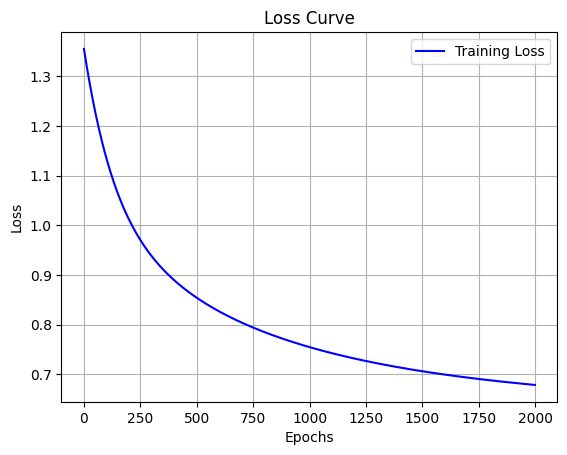

In [34]:
X_train_np = X_train.to_numpy()  
y_train_np = y_train.to_numpy()  
W, b, loss_history = softmax_regression(X_train_np, y_train_np, alpha=0.01, epochs=2000)

def plot_loss_curve(loss_history):
    """
    Plots the loss curve using the recorded loss history.

    Args:
    - loss_history (list): List of loss values over epochs.
    """
    plt.plot(loss_history, color='blue', label='Training Loss')
    plt.title('Loss Curve')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_loss_curve(loss_history)


In [17]:
def predict(X, W, b):
    """
    Predict the class labels for new data points.
    
    Args:
    - X (numpy.ndarray): Feature matrix for new data (shape: (num_samples, num_features))
    - W (numpy.ndarray): Learned weights (shape: (num_features, num_classes))
    - b (numpy.ndarray): Learned biases (shape: (1, num_classes))
    
    Returns:
    - predictions (numpy.ndarray): Predicted class labels (shape: (num_samples,))
    """
    scores = np.dot(X, W) + b
    probs = softmax(scores)  
    return np.argmax(probs, axis=1) 

In [18]:
def test_predict():
    X_train = np.random.randn(100, 3)
    W = np.random.randn(3, 3)
    b = np.random.randn(1, 3)
    predictions = predict(X_train, W, b)
    assert predictions.shape[0] == X_train.shape[0], "Test failed: Prediction output size mismatch"
    print("test_predict passed!")
test_predict()

test_predict passed!


In [19]:
train_predictions = predict(X_train, W, b)
test_predictions = predict(X_test, W, b)

train_accuracy = accuracy_score(np.argmax(y_train, axis=1), train_predictions)
test_accuracy = accuracy_score(np.argmax(y_test, axis=1), test_predictions)

print(f"Training Accuracy: {train_accuracy * 100:.2f}%")
print(f"Testing Accuracy: {test_accuracy * 100:.2f}%")

Training Accuracy: 70.79%
Testing Accuracy: 71.51%
